In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

gender_submission.csv
test.csv
train.csv



In [2]:
df = pd.read_csv('../input/train.csv')
testdf = pd.read_csv('../input/test.csv')

In [3]:
print(testdf.head())
testdf.columns.values


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
testdf = testdf.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
print(df.isnull().sum())
print(testdf.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [6]:
df['Embarked'].fillna('S', inplace = True)
df['Age'].fillna(df['Age'].median(), inplace = True)
testdf['Embarked'].fillna('S', inplace = True)
testdf['Age'].fillna(df['Age'].median(), inplace = True)
testdf['Fare'].fillna(df['Fare'].median(), inplace = True)

In [7]:
df.groupby('Survived').count()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342


In [8]:
print(df.isnull().sum())
print(testdf.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [9]:
df.dtypes.sample(9)

Embarked        object
Sex             object
SibSp            int64
Age            float64
Parch            int64
Fare           float64
Survived         int64
Pclass           int64
PassengerId      int64
dtype: object

In [10]:
#change object variables into numerical
df2 = pd.get_dummies(df)
df2.drop(['Survived', 'PassengerId'], axis = 1, inplace = True)
print(df2.columns.values)
testdf2 = pd.get_dummies(testdf)
print(testdf2.columns.values)


['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S']
['PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S']


In [11]:
#OK now we have a workable data set
from sklearn import tree
import graphviz
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [12]:
clf.fit(df2, df['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

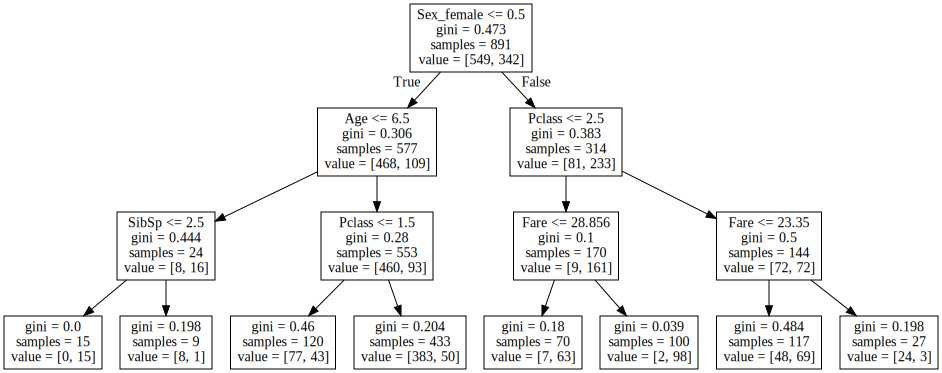

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = df2.columns.values) 
graph = graphviz.Source(dot_data)
graph

In [14]:
predictions = clf.predict(testdf2.drop('PassengerId', axis = 1))

In [15]:
output = pd.DataFrame({'PassengerId':testdf2['PassengerId'], 'Survived': predictions})


In [16]:
print(output)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3

In [17]:
output.to_csv('Tucker BAX 452.csv', index = False)